In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/GRS 1739-278.txt")

GRS 1739-278
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,GRS 1739-278,68,[Crook-Mansour et al. (in prep.) & ],[Crook-Mansour et al. (in prep.) & ],NaN,NaN


In [4]:
source_df

,name,class,l_deg,b_deg,coordinates_refs,D,D_prob,distance_distribution_text,distance_refs
0,GRS 1739-278,candidateBH,0.67,1.18,[],8,"(""uniform"", 6.0, 8.5)",\text{uncertain; possibly} \sim 8.0,[https://ui.adsabs.harvard.edu/abs/1996A%26A.....


In [5]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,GRS 1739-278,1688086271,L,60125.06613,0.010271,NaN,SS,1.060,0.056648,0.046,NaN,NaN,False
1,GRS 1739-278,1688764579,L,60132.91834,0.010271,NaN,SS,0.182,0.025667,0.034,NaN,NaN,False
2,GRS 1739-278,1689525980,L,60141.72942,0.010271,NaN,SS,0.120,0.040000,0.040,NaN,NaN,True
3,GRS 1739-278,1689958275,L,60146.73292,0.010271,NaN,SS,0.120,0.040000,0.040,NaN,NaN,True
4,GRS 1739-278,1690568489,L,60153.79581,0.010271,NaN,IMS,0.100,0.033333,0.033,NaN,NaN,True


In [6]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,GRS 1739-278,33812089,60123.10298,NaN,peak/trough,SS,4.265800e-09,5.128703e-10,5.244525e-10,NaN,NaN,False
1,GRS 1739-278,33812090,60133.61575,NaN,decay,SS,2.837900e-09,2.864488e-10,2.865229e-10,NaN,NaN,False
2,GRS 1739-278,33812091,60140.55622,NaN,decay,SS,2.103800e-09,2.168598e-10,2.184804e-10,NaN,NaN,False
3,GRS 1739-278,33812092,60147.36391,NaN,decay,SS,1.069100e-09,1.114614e-10,1.151133e-10,NaN,NaN,False


# Light Curves

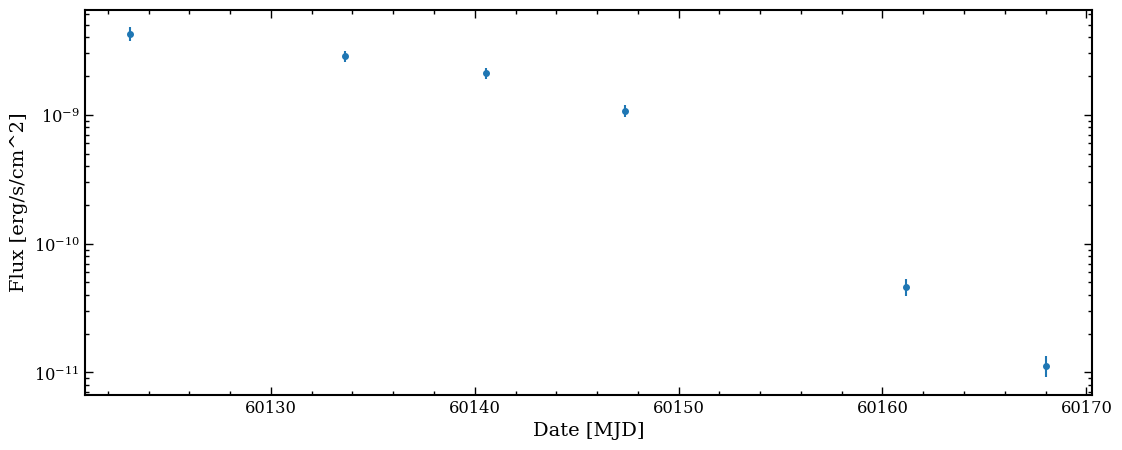

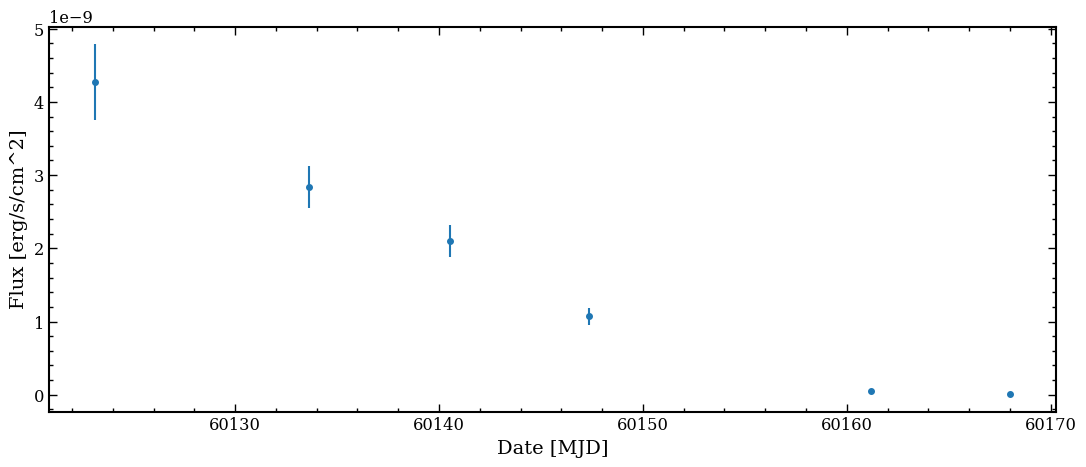

In [7]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

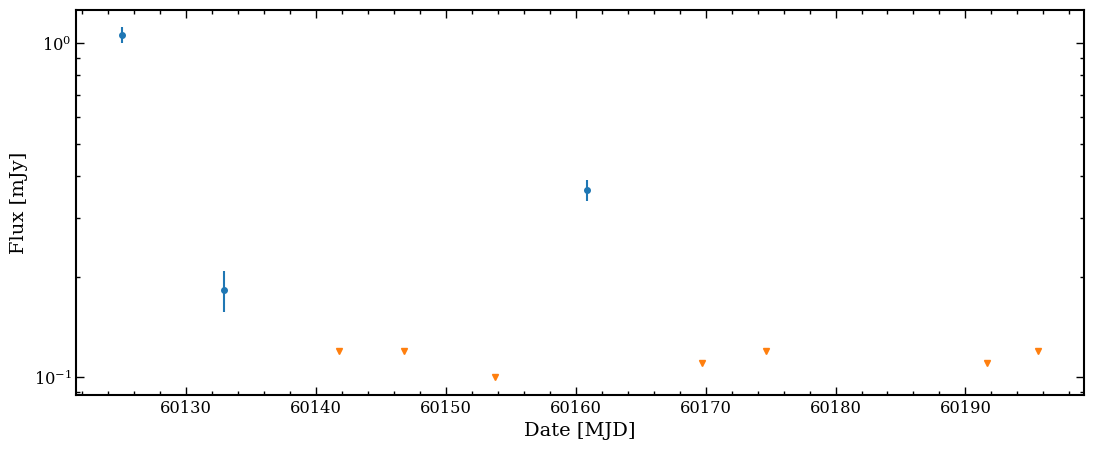

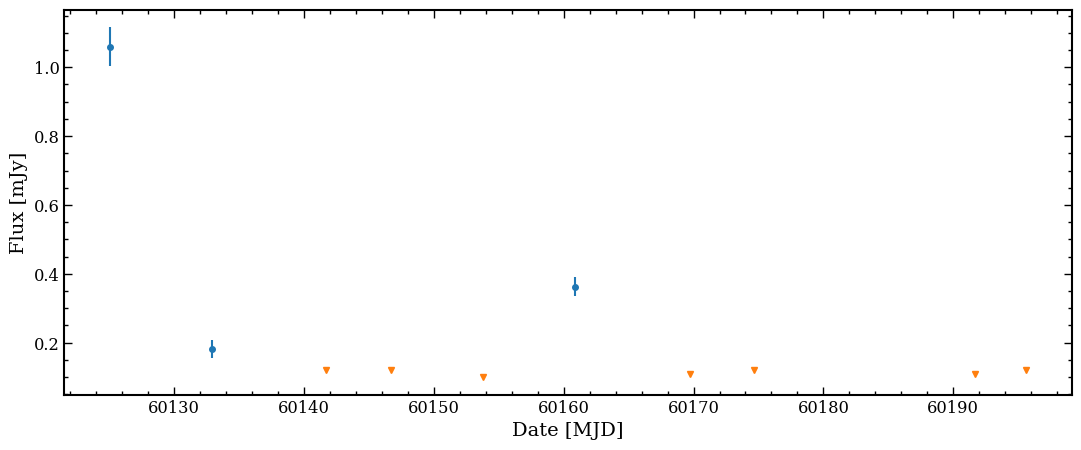

In [8]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [9]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
60132.918340000     0.18200             0.02567             1         2.83790e-09                   2.86449e-10                   2.86523e-10                   False          False          SS             
60146.732920000     0.12000             0.04000             1         1.06910e-09                   1.11461e-10                   1.15113e-10                   True           False          SS             
60160.832700000     0.36300             0.02701             1         4.57090e-11                   6.75292e-12                   7.21106e-12                   False          False          HS             
Converting to luminosity using d_kpc = 8


In [10]:
paired_data[["t","Lr", "Lx", "Fx"]]

,t,Lr,Lx,Fx
0,60132.91834,1.784280e+28,2.173596e+37,2.837900e-09
1,60146.73292,1.176448e+28,8.188418e+36,1.069100e-09
2,60160.83270,3.558757e+28,3.500930e+35,4.570900e-11


In [11]:
lr_all, lx_all, all_types = get_bahramian_data()

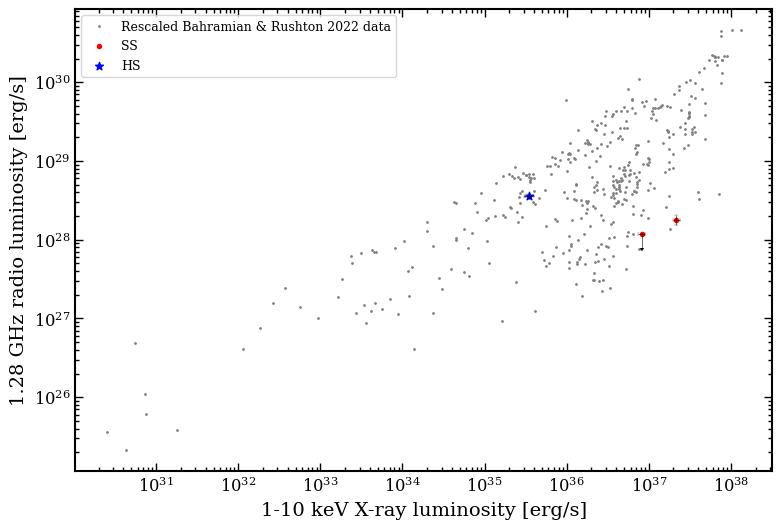

In [12]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  88
60125.06613: time_to_nearest: 1.9631499999959487 & time_to_furthest: 8.549619999997958; y_predict_err: 0.045135790044069424
60132.91834: time_to_nearest: 0.6974100000006729 & time_to_furthest: 9.815359999993234; y_predict_err: 0.04615117076028419
60141.72942: time_to_nearest: 1.1732000000047265 & time_to_furthest: 5.634489999996731; y_predict_err: 0.0488406356500839
60146.73292: time_to_nearest: 0.630989999997837 & time_to_furthest: 6.1767000000036205; y_predict_err: 0.04596525610713442
Rejected based on distance: radio_MJD = 60153.79581; time_to_nearest: 6.431900000003225; time_to_furthest: 7.378799999998591
60160.8327: time_to_nearest: 0.34191000000282656 & time_to_furthest: 13.46878999999899; y_predict_err: 0.06938287171898594
Rejected based on distance: radio_MJD = 60169.7067; time_to_nearest: 1.6732800000027055; time_to_furthest: inf
Rejected based on distance: radio_MJD = 60174.65093; time_to_nearest: 6.617510000003676; time_to_

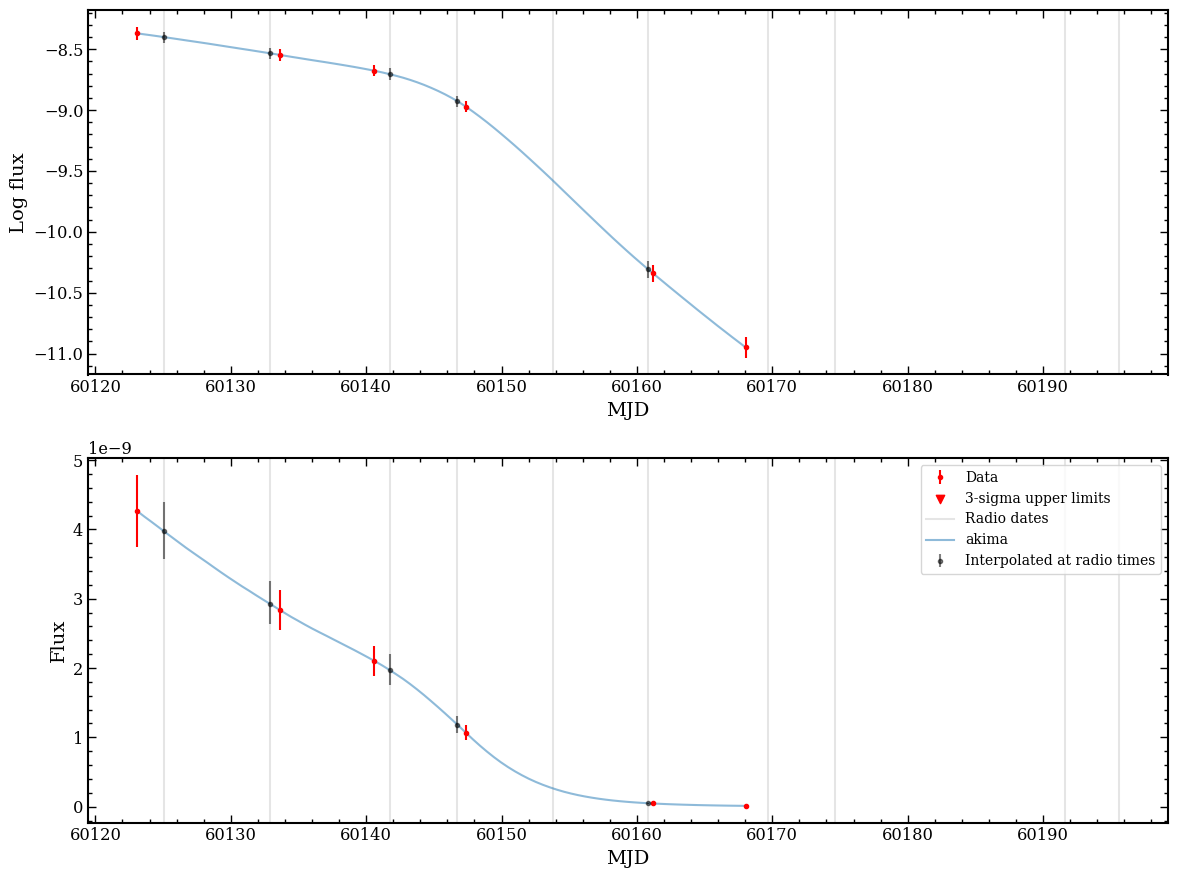

Number of used interpolated data points:  5
Converting to luminosity using d_kpc = 8


In [13]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

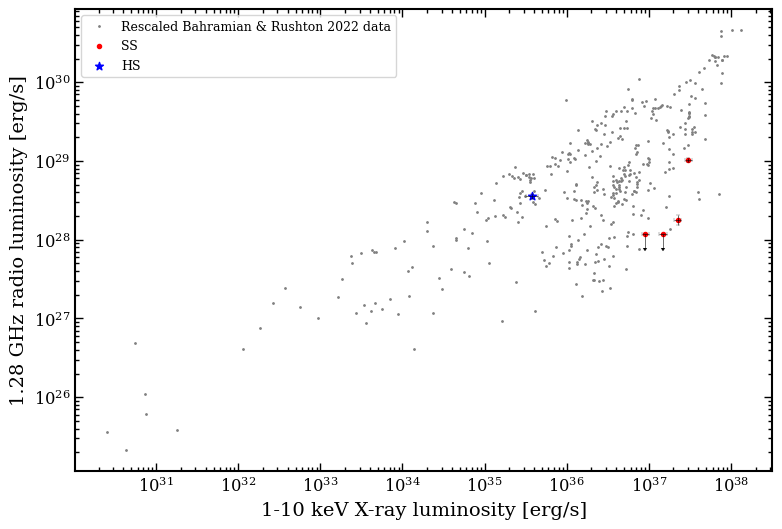

In [14]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)